### EDA Para el DataSet Reviews California

El archivo Reviews california.csv fue obtenido a partir de dividir en dos el archivo: ______________   el cual fue trabajado por el Data Scientist Jesus.

In [2]:
from ydata_profiling import ProfileReport

In [3]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el archivo CSV con los datos de las reviews de California
file_path = 'Reviews california.csv'
Reviews_Calf_DF = pd.read_csv(file_path)

# Mostrar las primeras filas del dataset para ver su estructura
print(Reviews_Calf_DF.head())


        user_id           name           time  rating  \
0  1.089912e+20        Song Ro  1609909927056       5   
1  1.112903e+20    Rafa Robles  1612849648663       5   
2  1.126404e+20      David Han  1583643882296       4   
3  1.174403e+20    Anthony Kim  1551938216355       5   
4  1.005808e+20  Mario Marzouk  1494910901933       5   

                                               text pics resp  \
0                      Love there korean rice cake.  NaN  NaN   
1                                    Good very good  NaN  NaN   
2  They make Korean traditional food very properly.  NaN  NaN   
3                    Short ribs are very delicious.  NaN  NaN   
4      Great food and prices the portions are large  NaN  NaN   

                                 gmap_id  
0  0x80c2c778e3b73d33:0xbdc58662a4a97d49  
1  0x80c2c778e3b73d33:0xbdc58662a4a97d49  
2  0x80c2c778e3b73d33:0xbdc58662a4a97d49  
3  0x80c2c778e3b73d33:0xbdc58662a4a97d49  
4  0x80c2c778e3b73d33:0xbdc58662a4a97d49  


In [3]:
Reviews_Calf_DF.head(3)

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.089912e+20,Song Ro,1609909927056,5,Love there korean rice cake.,NaN,NaN,0x80c2c778e3b73d33:0xbdc58662a4a97d49
1,1.112903e+20,Rafa Robles,1612849648663,5,Good very good,NaN,NaN,0x80c2c778e3b73d33:0xbdc58662a4a97d49
2,1.126404e+20,David Han,1583643882296,4,They make Korean traditional food very properly.,NaN,NaN,0x80c2c778e3b73d33:0xbdc58662a4a97d49


In [10]:
# Contar el número de columnas
num_columnas = Reviews_Calf_DF.shape[1]
print(f"Número de columnas: {num_columnas}")
# Obtener los nombres de las columnas
nombres_columnas = Reviews_Calf_DF.columns.tolist()
print("Nombres de las columnas:", nombres_columnas)
# Contar el número de filas
num_filas = Reviews_Calf_DF.shape[0]  # Utilizando shape
#print(f"Número de filas: {num_filas}")
# Formatear el número de filas con separador de miles
num_filas_formateado = f"{num_filas:,}"  # Usando f-string
print(f"Número de filas: {num_filas_formateado}")
# Alternativamente, usare este otro metodo para confirmar así que se puede usar len()
num_filas_len = len(Reviews_Calf_DF)  # Utilizando len()
#print(f"Número de filas (usando len): {num_filas_len}")
num_filas_formateado_len = f"{num_filas_len:,}"  # Usando f-string
print(f"Número de filas (usando len): {num_filas_formateado_len}")


Número de columnas: 8
Nombres de las columnas: ['user_id', 'name', 'time', 'rating', 'text', 'pics', 'resp', 'gmap_id']
Número de filas: 2,700,000
Número de filas (usando len): 2,700,000


### Detallando el diccionario para este dataSet  
1. user_id:  
 Identificador único del usuario que realizó la reseña. Este ID permite identificar de forma individual al usuario en la plataforma sin revelar información personal.  

2. name:  
 'XXX XXX' Nombre del usuario dejo reseña. Esto permite asociar una reseña con un usuario específico, esperamos sean nombres públicos.  

3. time:  
 1627750414677 Indica la fecha y hora en la que se realizó la reseña, expresada en formato de marca de tiempo Unix (timestamp) en milisegundos. Esta marca temporal debe ser convertida a una fecha y hora legibles. Para hacer el EDA

4. rating:   
 Calificación numérica otorgada por el usuario, parece ser una escala de 1 a 5, (5 más alta). Este número refleja la experiencia del usuario con el comercio o servicio.

5. text:  
 'Cool place, great people, awesome dentist!'
 Es el texto de la reseña escrita por el usuario, describiendo su experiencia. De aqui podriamos obtener el analisis de sentimientos

6. pics:  
 [{'url': ['https://lh5.googleusercontent.com/p/AF1QipNq2nZC5TH4_M7h5xRAd61hoTgvY1o9lozABguI=w150-h150-k-no-p']}]
 Es una lista de diccionarios que contiene imágenes subidas por el usuario como parte de la reseña. Cada diccionario incluye la URL de la imagen, que apunta al recurso almacenado en línea, normalmente en servidores de Google.

7. resp:  
 time: 1628455067818
 Representa la fecha y hora en que se hizo la respuesta a la reseña, en formato de marca de tiempo Unix.
 text: 'Thank you for your five-star review! -Dr. Blake'
 Es el texto de la respuesta del comercio o propietario a la reseña del usuario, mostrando la interacción entre el negocio y sus clientes.
8. gmap_id: '0x87ec2394c2cd9d2d:0xd1119cfbee0da6f3'
 Es el identificador único del lugar en Google Maps al que se refiere la reseña. Este ID se utiliza para enlazar la reseña con un comercio o localización específica en la plataforma de mapas.

### La siguiente parte busca sacar algunas estadisticas del data set para decidir 

            user_id          time        rating
count  2.700000e+06  2.700000e+06  2.700000e+06
mean   1.093547e+20  1.551464e+12  4.313987e+00
std    5.239594e+18  4.648164e+10  1.124260e+00
min    1.000000e+20  6.626016e+11  1.000000e+00
25%    1.048907e+20  1.522967e+12  4.000000e+00
50%    1.093188e+20  1.555199e+12  5.000000e+00
75%    1.138802e+20  1.582251e+12  5.000000e+00
max    1.184467e+20  1.631149e+12  5.000000e+00


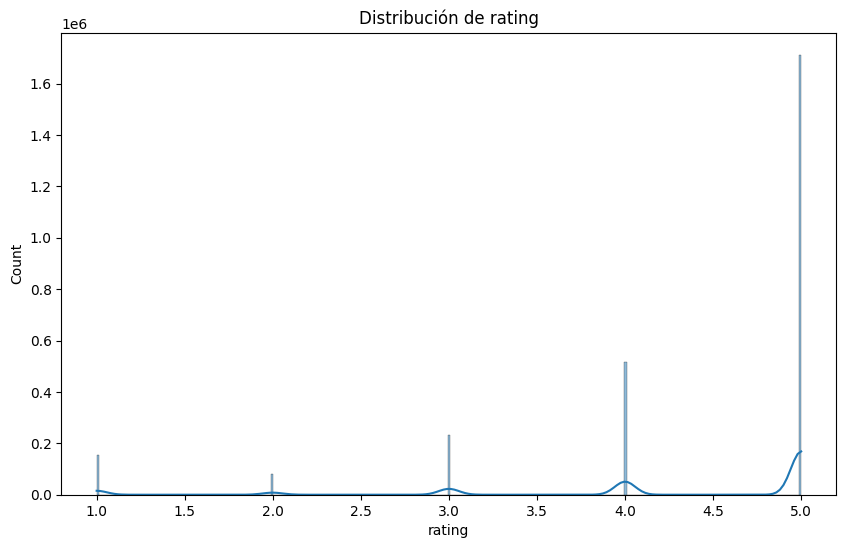

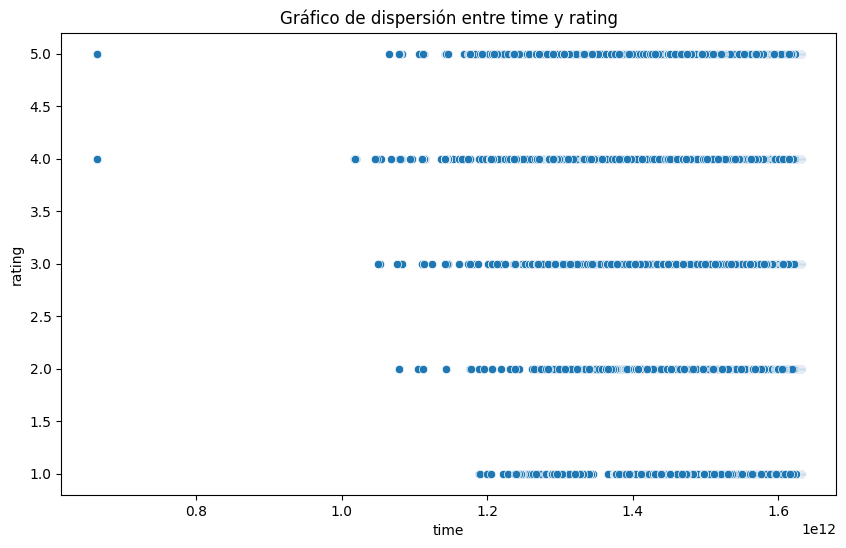

In [13]:

# Describir las estadísticas básicas
print(Reviews_Calf_DF.describe())

# Visualizar algunas distribuciones de datos
# Histograma de una columna específica
plt.figure(figsize=(10, 6))
sns.histplot(Reviews_Calf_DF['rating'], kde=True)
plt.title('Distribución de rating')
plt.show()

# Gráfico de dispersión entre dos columnas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='time', y='rating', data=Reviews_Calf_DF)
plt.title('Gráfico de dispersión entre time y rating')
plt.show()

A continuaci

In [16]:
# Ahora aplique o use la biblioteca ydata_profiling al conjunto de datos usando ProfileReport
ProfileReport(Reviews_Calf_DF)
# I discovered need  install ipywidgets to use the library 
# the next step is install this library or module.
#open terminal and execute this: pip install ipywidgets
# I run again
#problemas de memoria ram al ejecutar el comando ProfileReport(Reviews_Calf_DF)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

In [4]:
# Reajustando el tamaño de la muestra
sample_df = Reviews_Calf_DF.sample(frac=0.5)  # Usa el 10% del conjunto de datos
profile = ProfileReport(sample_df, title="Informe EDA Exhaustivo", explorative=True)
profile.to_file("informe_eda_exhaustivo.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
ProfileReport(sample_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Ajustando el informe

In [6]:
#Copio el dataframe sample_df para no modificar el original
Reviews_Calf_DF_copy = Reviews_Calf_DF.copy()
# Optimizar tipos de datos
for col in Reviews_Calf_DF_copy.select_dtypes(include=['float64']).columns:
    Reviews_Calf_DF_copy[col] = Reviews_Calf_DF_copy[col].astype('float32')

for col in Reviews_Calf_DF_copy.select_dtypes(include=['int64']).columns:
    Reviews_Calf_DF_copy[col] = Reviews_Calf_DF_copy[col].astype('int32')

In [13]:
# Usar una muestra del conjunto de datos  (90% no, 80% no, 50% si)
sample_df_2 = Reviews_Calf_DF_copy.sample(frac=0.8)  # Usa el 10% del conjunto de datos o lo que coloque despues del 0.X

### EDA Exhaustivo para armar el ETL y Dashboard

In [14]:
# Dare valores o parametros especificos al informe

ProfileReport(sample_df_2 , title="Informe EDA Exhaustivo", explorative=True, minimal=True, correlations={"pearson": {"calculate": True}})

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

MemoryError: Unable to allocate 2.31 GiB for an array with shape (154979752,) and data type complex128